In [1]:
#https://fxdata.cloud/tutorials/a-guide-for-time-series-forecasting-with-arima-in-python-3
#https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
#change Server=your server name in SQL management studio
%matplotlib inline
import pyodbc 
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

cnxn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=DESKTOP-556NPKF;"
                      "Database=AdventureWorks2012;"
                      "Trusted_Connection=yes;")

In [326]:
#df = pd.read_sql_query(""" 
#SELECT A.[SalesOrderID]
#,A.[LineTotal]
#,B.[OrderDate]
#,C.[Name]
#FROM [Sales].[SalesOrderDetail] AS A
#LEFT JOIN [Sales].[SalesOrderHeader] AS B
#ON A.SalesOrderID = B.SalesOrderID
#LEFT JOIN [Sales].[SalesTerritory] AS C
#ON B.TerritoryID = C.TerritoryID
#WHERE C.[Name]""", cnxn)

In [327]:
#List of regions
#Northwest, Northeast, Central, Southwest, Southeast, Canada, France, Germany, Australia, United Kingdom

In [2]:
df = pd.read_sql_query(""" 
SELECT
A.[LineTotal]
,B.[OrderDate]
FROM [Sales].[SalesOrderDetail] AS A
LEFT JOIN [Sales].[SalesOrderHeader] AS B
ON A.SalesOrderID = B.SalesOrderID
LEFT JOIN [Sales].[SalesTerritory] AS C
ON B.TerritoryID = C.TerritoryID
WHERE C.[Name] = 'United Kingdom'
""", cnxn)

In [4]:
df.head(5)

,LineTotal,OrderDate
0,699.0982,2005-07-03
1,3578.2700,2005-07-05
2,3578.2700,2005-07-06
3,3578.2700,2005-07-07
4,3399.9900,2005-07-09


In [5]:
df = df.set_index(['OrderDate'])

In [6]:
#Summarise the transactions by order month
# The 'MS' string groups the data in buckets by start of the month
y = df['LineTotal'].resample('MS').sum()

In [7]:
y.head(5)

OrderDate
2005-07-01    37498.4346
2005-08-01    54334.1264
2005-09-01    62888.8628
2005-10-01    55414.7846
2005-11-01    26966.9046
Freq: MS, Name: LineTotal, dtype: float64

In [8]:
# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())


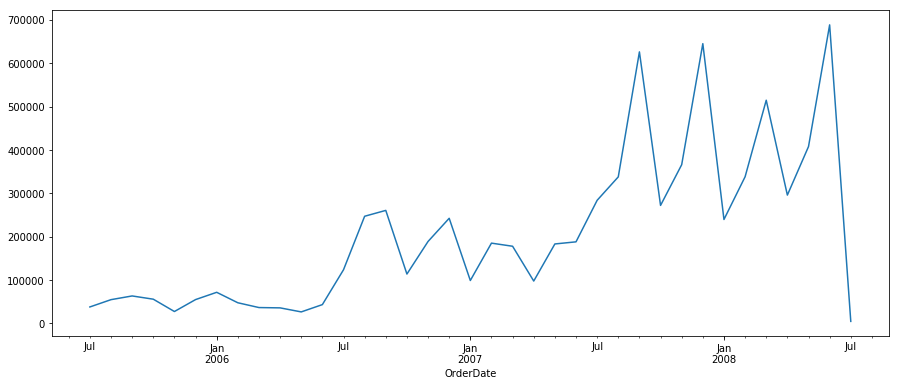

In [9]:
y.plot(figsize=(15, 6))
plt.show()

In [10]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [11]:
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1007.0021646259036
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:663.7177852265322
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:674.2344171932737
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:356.5390653362175
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:961.9369232635406
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:36383.59655086874
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:628.6565577558054
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:687.6707250935023
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:634.8845562791312
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:356.41870156953235
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:950.9106813364878
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:635.0625526448932
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:660.7449568098325
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:338.8886357933551
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:912.7808032079578
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:596.044126553396
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:

In [12]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
tmp_model = None
best_mdl = None
 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            tmp_mdl = sm.tsa.statespace.SARIMAX(y,
                                                order = param,
                                                seasonal_order = param_seasonal,
                                                enforce_stationarity=True,
                                                enforce_invertibility=True)
            res = tmp_mdl.fit()
            if res.aic < best_aic:
                best_aic = res.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_mdl = tmp_mdl
        except:
            
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 0)x(1, 1, 0, 12)12 model - AIC:650.3780722218617


In [13]:
# print statistics
print(res.aic)
print(res.summary())

963.8818501956237
                           Statespace Model Results                           
Dep. Variable:              LineTotal   No. Observations:                   37
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -478.941
Date:                Wed, 26 Aug 2020   AIC                            963.882
Time:                        21:06:34   BIC                            968.632
Sample:                    07-01-2005   HQIC                           965.540
                         - 07-01-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3841      0.414     -0.928      0.353      -1.195       0.427
ma.L1         -0.5798      0.338     -1.714      0.087      -1.243       0.083
sigma2      2.808e+10   2.06e-11  

In [14]:
plt.style.use('fivethirtyeight')
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

In [15]:
# print statistics
#print(result.aic)
#print(result.summary())

In [16]:
from scipy.stats import chi2
chi = chi2.isf(q=0.05, df=116)
chi

142.13816003902645

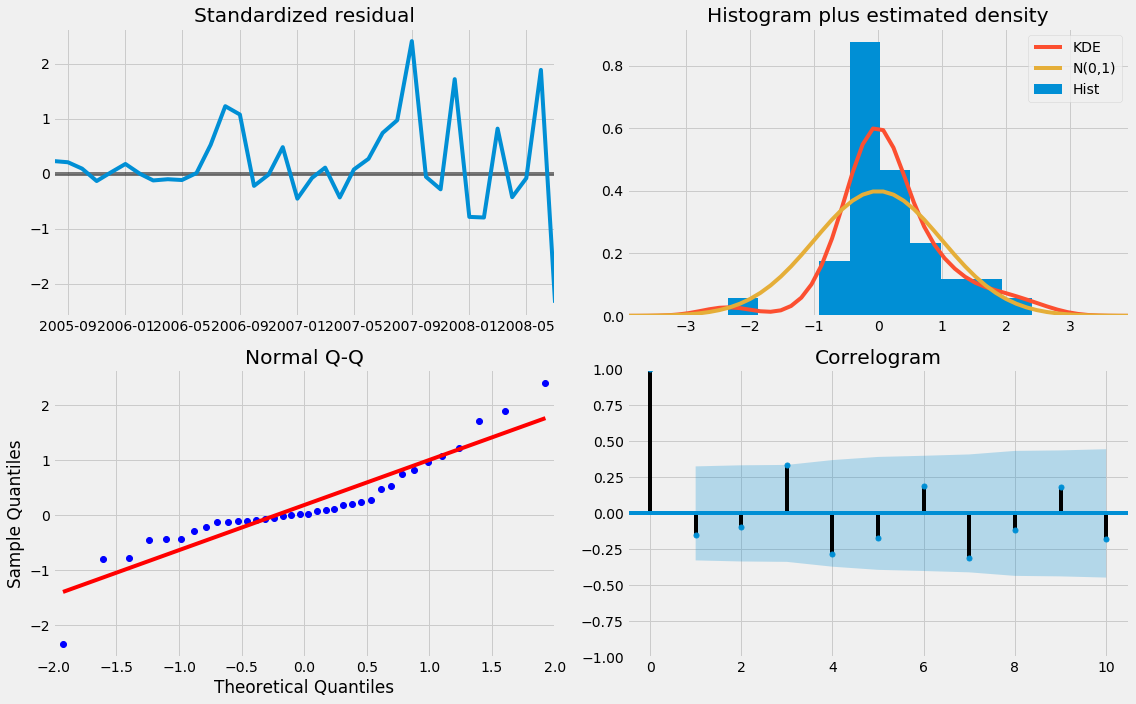

In [17]:
res.plot_diagnostics(figsize=(16, 10))
plt.tight_layout()
plt.show()

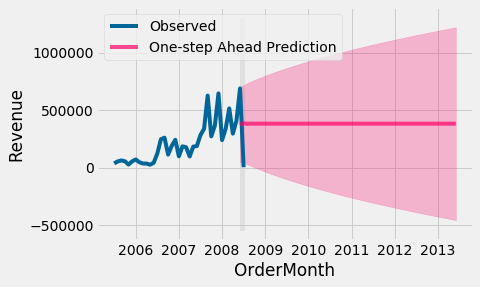

In [18]:
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2008-06-01'), 
                          end=pd.to_datetime('2013-06-01'),
                          dynamic=True)
pred_ci = pred.conf_int()
 
# plot in-sample-prediction
ax = y.plot(label='Observed',color='#006699');
pred.predicted_mean.plot(ax=ax, label='One-step Ahead Prediction', alpha=.7, color='#ff0066');
 
# draw confidence bound (gray)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], color='#ff0066', alpha=.25);
 
# style the plot
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2008-06-01'), y.index[-1], alpha=.15, zorder=-1, color='grey');
ax.set_xlabel('OrderMonth')
ax.set_ylabel('Revenue')
plt.legend(loc='upper left')
plt.show()

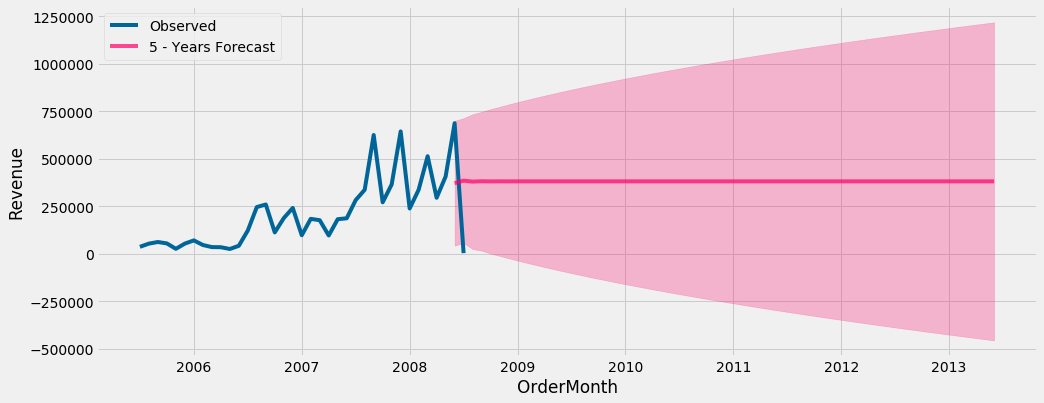

In [19]:
#pred.predicted_mean
# plot in-sample-prediction
ax = y.plot(label='Observed',color='#006699');
pred.predicted_mean.plot(figsize=(15, 6),label='5 - Years Forecast', alpha=.7, color='#ff0066')
# draw confidence bound (gray)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], color='#ff0066', alpha=.25);
#y.plot(figsize=(15, 6))
ax.set_xlabel('OrderMonth')
ax.set_ylabel('Revenue')
plt.legend(loc='upper left')
plt.show()

In [20]:
all_dfs = [y, pred.predicted_mean]

In [21]:
df = pd.DataFrame(np.array(pd.concat(all_dfs).reset_index(drop=False)), columns =  ['Month', 'Revenue'])

In [22]:
df = df.set_index(['Month'])

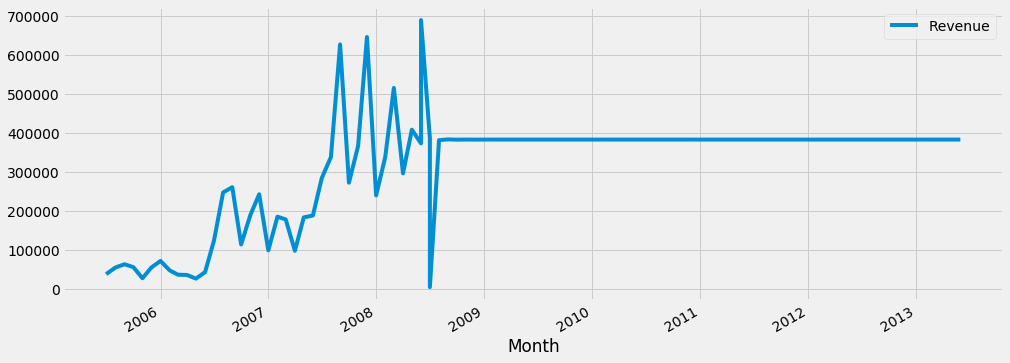

In [23]:
#df.plot(label='Revenue',color='#006699');
df.plot(figsize=(15, 6))

In [24]:
df.head(5)

,Revenue
Month,
2005-07-01,37498.4
2005-08-01,54334.1
2005-09-01,62888.9
2005-10-01,55414.8
2005-11-01,26966.9


In [25]:
df.tail(5)

,Revenue
Month,
2013-02-01,382192
2013-03-01,382192
2013-04-01,382192
2013-05-01,382192
2013-06-01,382192
